# Linear Models with Scikit-learn

## Simple Linear Regression Dataset

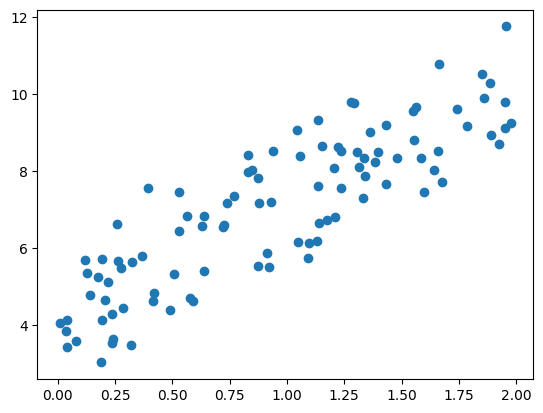

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
x = 2 * np.random.rand(100, 1)  
y = 4 + 3 * x + np.random.randn(100, 1)

# Plot the data
plt.scatter(x, y)
plt.show()

## Linear Regression Model

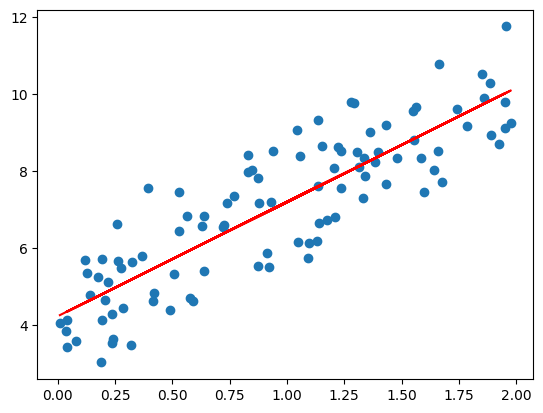

In [11]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data and the model's prediction
# Plotting the best-fit line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

### Intercept and Coefficients

In [3]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: [4.22215108]
Coefficient: [[2.96846751]]


### Mean Squared Error

In [4]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9924386487246479


# Logisitic Regression with Scikit-learn

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

### Plot the data + the logistic function + the linear regression

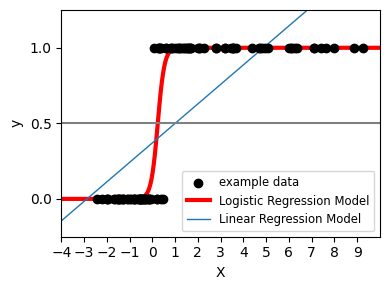

In [17]:
# Fit the classifier
clf = LogisticRegression(C=1e5) # C is the inverse of regularization strength
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X, y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel() # expit is the logistic function (sigmoid) 1/(1+exp(-t)) | ravel returns a flattened array
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

In [15]:
# accuracy
accuracy = clf.score(X, y)
print(f'Accuracy: {accuracy}')

Accuracy: 0.96


## Linear Regression and Ridge Regression Variance

As we can see by the plot, the linear regression model has a high variance, while the ridge regression model has a low variance. This is because the ridge regression model is less sensitive to the input data, and therefore, it has a lower variance. This is due to the regularization term in the ridge regression model, which penalizes large coefficients, and therefore, reduces the variance of the model.

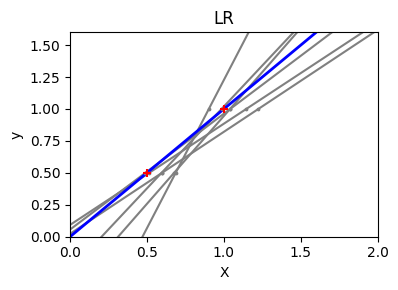

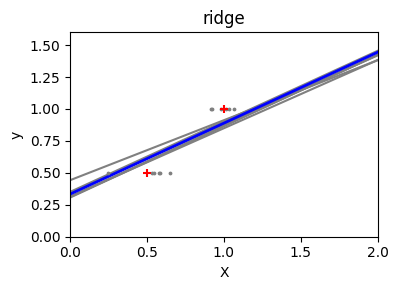

In [19]:
from sklearn.linear_model import Ridge

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    LR=LinearRegression(), ridge=Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()